# **SPAM SMS DETECTION**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨💻Author: Irfan Ullah Khan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)
[![Website](https://img.shields.io/badge/Website-Contact%20Me-red?style=for-the-badge&logo=website)](https://datasciencetoyou.odoo.com/)

In [1]:
# Importing libraries and fetching data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("spam.csv")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ? b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data.shape

(5572, 5)

<Axes: xlabel='v1', ylabel='count'>

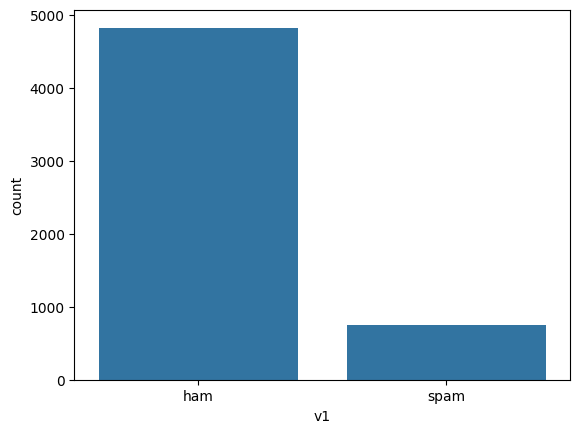

In [10]:
sns.countplot(x=data.v1)

We can see that our dataset contains mainly ham messages. This would limit the capability of model to classify correctly, but we can give it a try!

In [11]:
# We now look through the information in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can see that v1 and v2 corresponds to whether the messages are ham/spam and the message text.
However, we'll need to look through the Unnamed fields to explore whether they have any effect on the final conclusion.

In [12]:
data["Unnamed: 2"].value_counts().head()

 bt not his girlfrnd... G o o d n i g h t . . .@"       3
 PO Box 5249                                            2
this wont even start........ Datz confidence.."         2
GN                                                      2
 don't miss ur best life for anything... Gud nyt..."    2
Name: Unnamed: 2, dtype: int64

So we've 5 columns:
1. Containing the target whether the message is ham/spam
2. Text Field 1
3. Text Field 2
4. Text Field 4
5. Text Field 5

We can safely say that the amount of data in the Unnamed columns are negligible and can be dropped without any alterations to the remaining data.

Also, fortunately, we've no null values in v1 and v2

In [13]:
# Incase the package is unavailable
# pip install nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Incase the package is unavailable
# import nltk
# nltk.download('stopwords')

# We can now move further to data processing

import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def simplify_data(data):
    # Create new tables named "Spam" and "Text"
    # Convert ham/spam to 0/1, 1 indicating Spam and fill them under Spam
    # Clean text by removing all special characters
    # Drop unwanted columns

    data = pd.read_csv("spam.csv")          # Refreshing data, just in-case the code is ran after running further modules
    data["Spam"] = data.v1.map({'ham':0, 'spam':1})
    data["Text"] = data.v2.str.lower()
    data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')
    data = data.drop(["v1", "v2", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
    return data

def remove_stopwords(message):
    # Remove stop words from the text

    stop_words = set(stopwords.words('english'))
    message = message.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in message.split() if word not in stop_words and len(word) > 2]
    return " ".join(text)

def text_length(text):
    return len(text)

def format_length(data):
    data["Length"] = data.Text.apply(text_length)
    data.Length = pd.cut(data.Length, [-1, 10, 20, 30, 50, 75, 100, 999], labels=[10,20,30,50,75,100,200])
    return data

def apply_transformations(data):
    data = simplify_data(data)
    data.Text = data.Text.apply(remove_stopwords)
    data = format_length(data)
    return data

data = apply_transformations(data)
data.head()

<ipython-input-14-ca624ba48d38>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')


,Spam,Text,Length
0,0,jurong point crazy available bugis great world...,75
1,0,lar joking wif oni,20
2,1,free entry wkly comp win cup final tkts may te...,100
3,0,dun say early hor already say,30
4,0,nah dont think goes usf lives around though,50


<Axes: xlabel='Length', ylabel='Number of Spam messages'>

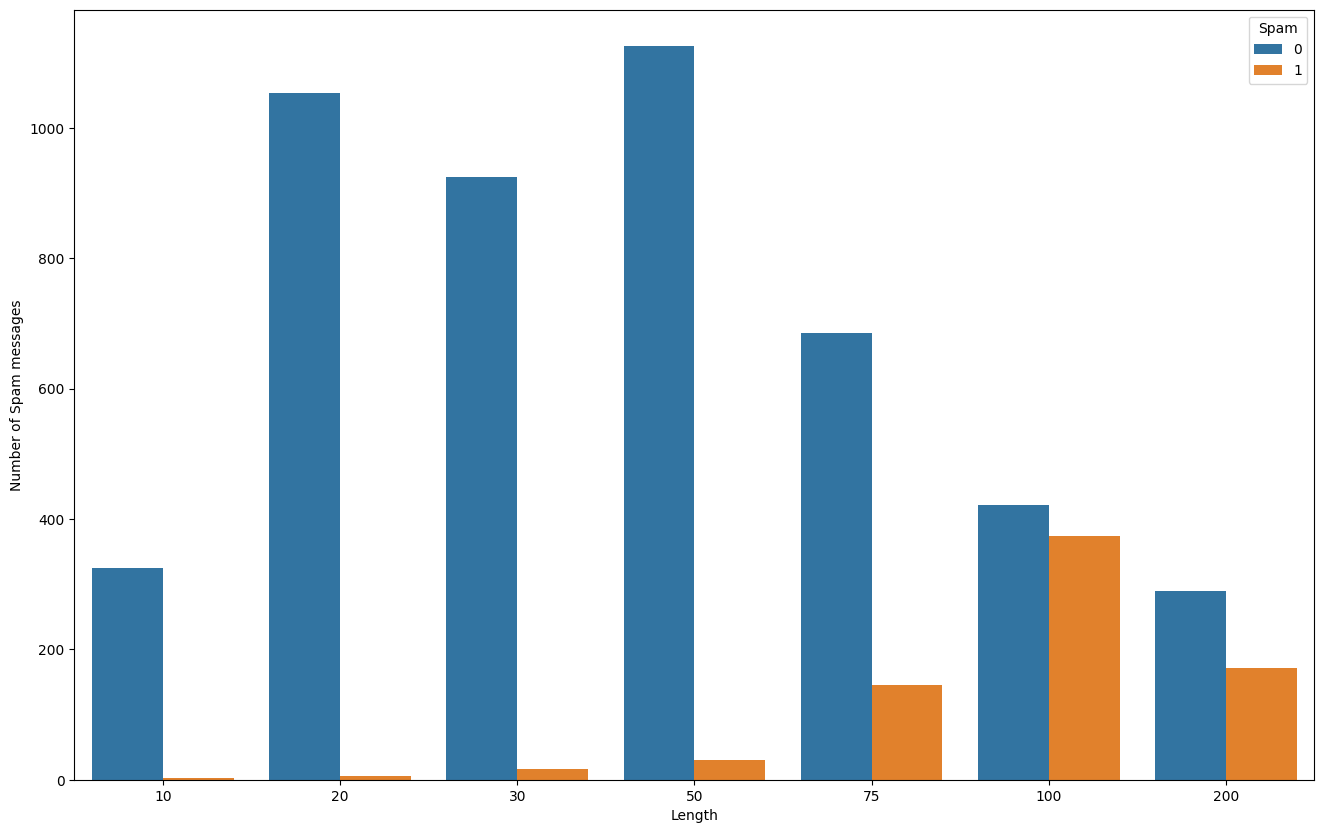

In [15]:
plt.figure(figsize=(16,10))
plt.xlabel("Length")
plt.ylabel("Number of Spam messages")
sns.countplot(x=data.Length, hue=data.Spam)

We can see that most messages with less length were mostly Ham messages and that the spam messages have a comparatively very small area. We can use this data further for classification. We also binned the lengths due to the broad spread it had previously.

In [16]:
# For the first model, we will try to create a feature of our own
# We can calculate number of spam words and the number of ham words
# These numbers can be compared to make out whether a message has
# more ham features or more spam features

# Calculating the number of Spam/Ham words in a message and Storing
# the diff Spam-Ham(0 if Ham>Spam, 1 if Spam>Ham))


# Create a list of all words occuring in Spam/Ham
spam_words = []
ham_words = []

def getSpam(text):
    global spam_words, spam_messages
    messages = text.split()
    words = [x for x in messages]
    spam_words += words

def getHam(text):
    global ham_words, ham_messages
    messages = text.split()
    words = [x for x in messages]
    ham_words += words

# Separate spam and ham messages
spam_messages = data[data["Spam"] == 1]["Text"]
ham_messages = data[data["Spam"] == 0]["Text"]

# Store common words in Spam/Ham
spam_messages.apply(getSpam)
ham_messages.apply(getHam)


def countSpam(text):
    count = 0
    for x in text.split():
        if x in spam_words:
            count += spam_words.count(x)
    return count

def countHam(text):
    count = 0
    for x in text.split():
        if x in ham_words:
            count += ham_words.count(x)
    return count

def getCounts(data):
    SpamCount = data.Text.apply(countSpam)
    HamCount = data.Text.apply(countHam)
    data["Diff"] = SpamCount - HamCount
    return data

def categorize(diff):
    if diff <= 0:
        return 0
    else:
        return 1

def apply_calc(data):
    data = getCounts(data)
    data.Diff = data.Diff.apply(categorize)
    return data

data = apply_calc(data)
data.head()

,Spam,Text,Length,Diff
0,0,jurong point crazy available bugis great world...,75,0
1,0,lar joking wif oni,20,0
2,1,free entry wkly comp win cup final tkts may te...,100,1
3,0,dun say early hor already say,30,0
4,0,nah dont think goes usf lives around though,50,0


In [17]:
spam_words.count("free")

219

In [18]:
ham_words.count("free")

59

Now that we've the algorithm to generate the required data(diff), we can try our model.

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(["Spam"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data.Spam, test_size=0.2, random_state=23)

Since we already have aur generated outputs in Diff column, we can now check the accuracy of the model on the training data

In [20]:
from sklearn.metrics import accuracy_score, make_scorer
print("Accuracy on train data: ", accuracy_score(X_train.Diff, y_train))
print("Accuracy on test data: ", accuracy_score(X_test.Diff, y_test))

Accuracy on train data:  0.9524343728965672
Accuracy on test data:  0.9434977578475336


A 94-95% accuracy sounds good for using only one parameter!
However, we can further try using different models and try to include length as a parameter.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X_train = X_train[["Length", "Diff"]]
X_test = X_test[["Length", "Diff"]]


# RandomForestModel
# Trying different parameters and selecting the best one's to run
clf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

# Predicting the reuslts and calculating the accuracy

preds = clf.predict(X_test)

clf_acc = nb_acc = accuracy_score(y_test, preds)
print("Accuracy with RandomForestClassifier: ", accuracy_score(y_test, preds))

# SVC model
svc_clf = SVC(gamma='scale')
svc_clf.fit(X_train,y_train)
svc_preds = svc_clf.predict(X_test)

svc_acc = accuracy_score(y_test, svc_preds)
print("Accuracy with SVC: ", accuracy_score(y_test, svc_preds))

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
print("Accuracy with NaiveBayesian: ", accuracy_score(y_test, nb_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy with RandomForestClassifier:  0.957847533632287
Accuracy with SVC:  0.8780269058295964
Accuracy with NaiveBayesian:  0.9434977578475336


We got a great accuracy with all models, including the programming approach! Our models are proving to be really great in detecting spam messages!

<Axes: xlabel='Length', ylabel='count'>

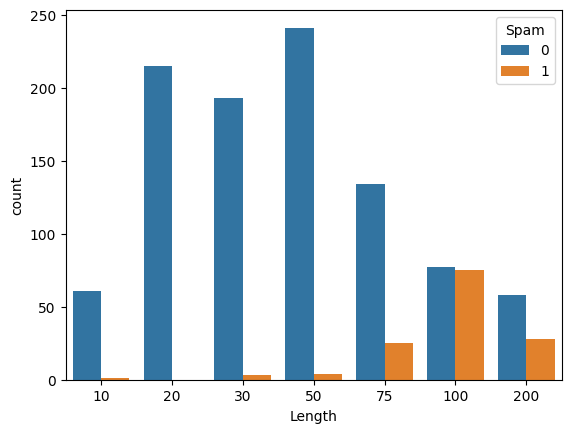

In [22]:
sns.countplot(x=X_test.Length, hue=y_test)

The model would be useless if we can't test custom inputs!
Finally we create a function to interact with front-end for predicting spam category for manual input.

Since we had the most accuracy with RandomForestClassifier, we'll use it for our predictions.

In [23]:
# Interface for the manual messages

def manual_entry():
    global clf
    temp = pd.DataFrame(columns=["Text"])
    temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)

    temp = format_length(temp)
    temp = apply_calc(temp)
    temp = temp.drop(["Text"], axis=1)

    if temp.Diff.loc[0] == 1:
        print("Spam")
    else:
        print("Ham")

manual_entry()

Enter message: Spam
Ham


<ipython-input-23-ccd7272d620d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data.Spam, data.Diff)

array([[4723,  102],
       [ 173,  574]])